In [1]:
#start training the model
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import joblib

In [2]:
df = pd.read_csv("matches_features.csv")

df["date"] = pd.to_datetime(df["date"], errors="coerce")
df["target"].isna().sum()
df = df.dropna(subset=["target"])
print(df["target"].isna().sum())  # should be 0


df["year"] = df["date"].dt.year
df["month"] = df["date"].dt.month
df["weekday"] = df["date"].dt.weekday


0


In [3]:
features = [
    "home_team_avg_goals_for",
    "home_team_avg_goals_against",
    "away_team_avg_goals_for",
    "away_team_avg_goals_against",
    "year", "month", "weekday"
]
X = df[features]
y = df["target"]


In [4]:

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [5]:

model = RandomForestClassifier(n_estimators=200, max_depth=10, random_state=42)
model.fit(X_train, y_train)


,n_estimators,200
,criterion,'gini'
,max_depth,10
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


Accuracy: 0.485


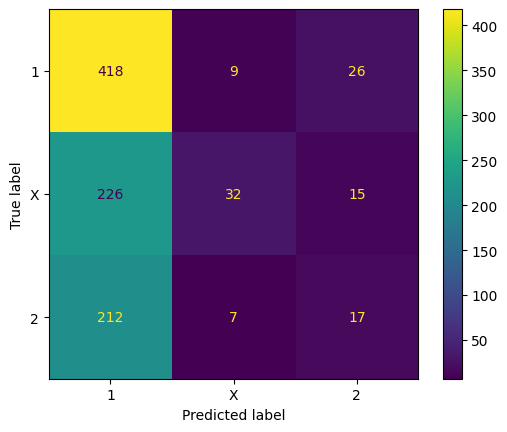

In [6]:


y_pred = model.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred):.3f}")

ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred), display_labels=["1", "X", "2"]).plot()


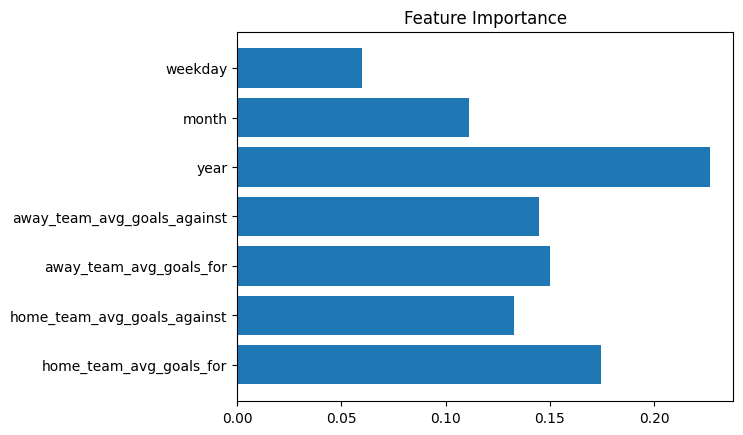

In [7]:


importances = model.feature_importances_
plt.barh(features, importances)
plt.title("Feature Importance")
plt.show()


In [8]:
joblib.dump(model, "../models/random_forest_model.pkl")

['../models/random_forest_model.pkl']